In [2]:
from numba import jit
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

def modlin(x,a,b):
    return a*x+b

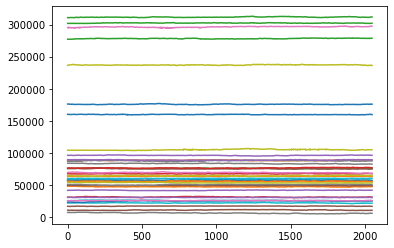

In [3]:
px=np.loadtxt('Trajectories_beads_agarose.txt')
Traj=np.array([px[:,k] for k in range(len(px[0]))])

for k in range(len(Traj)):
  plt.plot(Traj[k])
plt.show()
H=0.43

# (c)

In [ ]:
from scipy.stats import norm
i=0
Marker=['o','*','s','p']
H=0.43

for t in [2,4,8]:
    X=[]
    for ini in range(0,len(Values)-t):
        x0=Values[ini]
        X.append(Values[ini+t]-x0)
    h,bins=np.histogram(np.array(X)/t**H,density=True,bins=20)
    bins=(bins[1:]+bins[:-1])/2
    plt.plot(bins,h,Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
    i+=1

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$x/t^{0.43}$',fontsize=25)
plt.ylabel('Density',fontsize=25)
#plt.semilogy()
plt.ticklabel_format(axis='y',scilimits=[0, 0.008])
#plt.savefig('Gauss_microspeheres.svg')
plt.show()    

# (c')

[]

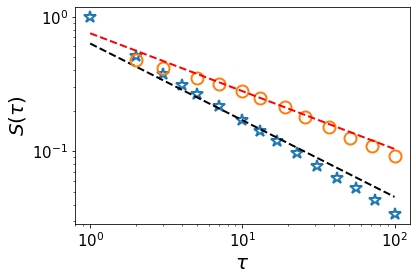

In [4]:
H=0.43


@jit(nopython=True)
def tau(V):
    tau=0
    M=V[0]
    while tau<len(V) and V[tau]<=M:
        tau+=1
    return tau

##
T=[]
T0=np.unique(np.int64(np.logspace(0,2,17)))
C=np.zeros(len(T0))
F=np.zeros(len(T0))

for u in range(len(Traj)):
    Values=Traj[u]
    for k in range(0,len(Values)-2):
      t=tau(Values[k:])
      C[T0<=(len(Values)-k)]+=1
      F[T0<=t]+=1
    


F/=C
##
from numba import jit
@jit(nopython=True)
def tau(V):
    T=[]
    M=V[0]
    tau=1
    for k in range(1,len(V)-1):
        if V[k]>M:
            T.append(tau)
            tau=1
        else:
            tau+=1
        M=max(V[k],M)
    return T


T=[]

epochs=1
window=len(Traj[0])//epochs
for k in range(len(Traj)):
  for m in range(epochs):
    T+=tau(Traj[k][m*window:(m+2)*window])[1:]


@jit(nopython=True)
def FreCum(T,Tl):
    S=[]
    for t in Tl:
        S.append(np.sum(T>t)/len(T))
    return S

##
Tl=np.unique(np.int64(np.logspace(0,2,15)))
Tl=np.float64(Tl)

dw=1/H
i=0
Marker=['*','o','s','p']


plt.plot(T0,F,Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0)
plt.plot(T0,(T0/T0[6])**(-1+H)*F[6],'--k',linewidth=2)
i+=1


S=np.array(FreCum(np.array(T),Tl))



plt.plot(Tl[1:],S[1:],Marker[i],markersize=12,linestyle='',fillstyle='none',linewidth=20,markeredgewidth=2.0) 

plt.plot(Tl,(Tl/Tl[5])**(-H)*S[5],'--r',linewidth=2)



plt.semilogx()
plt.semilogy()

plt.xlabel(r'$\tau$',fontsize=20)
plt.ylabel(r'$S(\tau)$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.semilogx()
plt.semilogy()

#plt.savefig('Records_microsphere.svg')
